In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load data
df = pd.read_csv('dataset_buys _comp.csv')  # Sesuaikan path
display(df.head())

# Cek info data
df.info()

# Lihat nilai unik
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load data
df = pd.read_csv('/content/dataset_buys _comp.csv')  # Sesuaikan path
display(df.head())

# Cek info data
df.info()

# Lihat nilai unik
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


,Age,Income,Student,Credit_Rating,Buys_Computer
0,Tua,Tinggi,Ya,Buruk,0
1,Paruh Baya,Tinggi,Ya,Baik,1
2,Paruh Baya,Rendah,Tidak,Buruk,1
3,Tua,Rendah,Tidak,Baik,1
4,Tua,Rendah,Ya,Baik,1


In [3]:
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])


In [4]:
X = data.drop('Buys_Computer', axis=1)
y = data['Buys_Computer']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [5]:
# Tuning dengan GridSearchCV
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [6]:
y_pred = best_model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Akurasi: 0.805

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        71
           1       0.88      0.81      0.84       129

    accuracy                           0.81       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.82      0.81      0.81       200


Confusion Matrix:
 [[ 57  14]
 [ 25 104]]


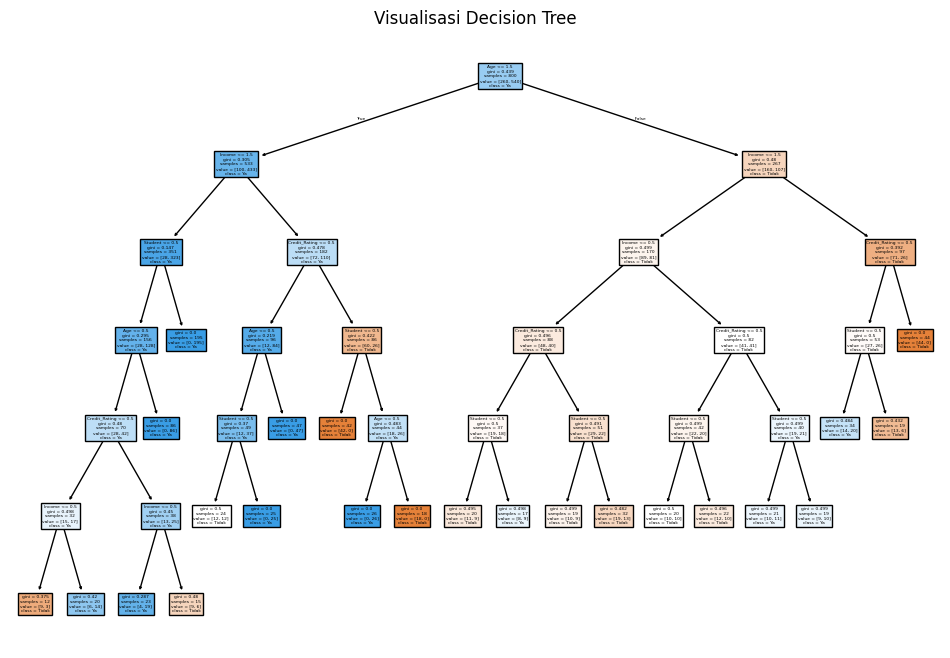

In [7]:
plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=X.columns, class_names=['Tidak', 'Ya'], filled=True)
plt.title("Visualisasi Decision Tree")
plt.show()
